In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
from dataset_constructor import MarketData
from strategy.statistical_model_startegy.arima_model_strategy import ARIMAModelStrategy
from strategy.statistical_model_startegy.vector_autoregression_model_strategy import VARModelStrategy
from strategy.statistical_model_startegy.prophet_model_strategy import ProphetModelStrategy

from backtest import Backtest
from visualization import visualize_backtest
from forecasting.rolling_forecast import RollingForecast

In [2]:
fit_start_date = pd.to_datetime('2019-09-01')
fit_end_date = pd.to_datetime('2019-12-31')
fit_duration = fit_end_date - fit_start_date

In [3]:
hyperparameter_grid = {
    ARIMAModelStrategy : {
        'order': [(0,1,0), (1,0,0), (0,1,1)],
        'thresholds': [0.0005 ,0.001],
    },
    VARModelStrategy : {
        'lags': [1,2],
        'thresholds': [0.0005 ,0.001],
    },
    ProphetModelStrategy : {
        'growth': ["linear", "flat"],
        'thresholds': [0.0005 ,0.001],
    },
}

In [4]:
strategy_classes = [
    ARIMAModelStrategy,
    VARModelStrategy,
    ProphetModelStrategy,
]


ARIMAModelStrategy


sharpe_ratio: -0.5693
max_drawdown: -0.9651


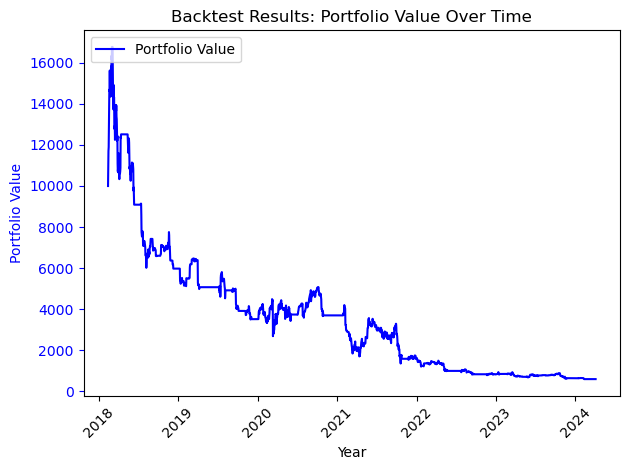


VARModelStrategy
sharpe_ratio: -0.2561
max_drawdown: -0.9518


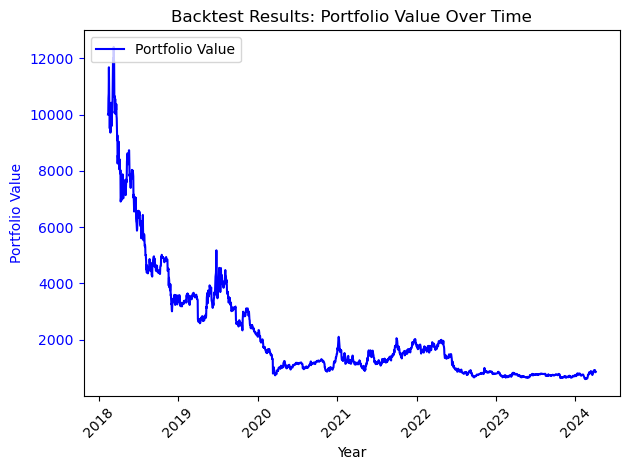


ProphetModelStrategy
sharpe_ratio: -0.3849
max_drawdown: -0.9987


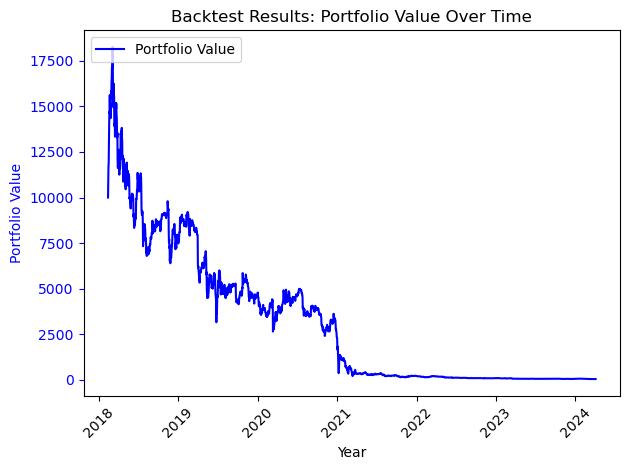

In [5]:
file_path = '../data/crypto/csv/BTC_USDT_1d.csv'
market_data = MarketData(file_path)

for strategy_class in strategy_classes:
    print(f"\n{strategy_class.__name__}")
    strategy = RollingForecast(
        data=market_data.data,
        strategy_class=strategy_class,
        start_date='2018-01-01',
        end_date=None,
        rolling_window=180,
        evaluation_window=30,
        hyperparameter_grid=hyperparameter_grid[strategy_class],
        val_ratio=0.2,
        fit_duration=fit_duration,
    )

    backtest = Backtest(market_data.data, strategy, fee=2e-4)
    backtest.run()
    portfolio = backtest.simulate_trades(initial_capital=10000)
    metrics = backtest.calculate_metrics()

    # Output metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    # Visualize the backtest
    visualize_backtest(portfolio)